**PROJECT TITLE** - **E-commerce User Behaviour Segmentation**

PRESENTED BY- ISHA SHRIVASTAVA

Project Domain- E-commerce Segmentation



Project Summary-

This project focuses on E-commerce User Behaviour Segmentation using the Online Retail dataset. The initial step involved loading the data, followed by a thorough cleaning process where missing customer IDs were removed, invalid quantities and unit prices were filtered out, data types were corrected (specifically for InvoiceDate and CustomerID), and duplicate entries were dropped. Subsequently, Feature Engineering was performed to calculate the Recency, Frequency, and Monetary (RFM) values for each customer, providing key metrics for segmentation. These RFM features were then scaled using StandardScaler in the Preprocessing stage. Hierarchical Clustering was applied to the scaled data to group customers into distinct segments, and the resulting clusters were visualized using a count plot and an interactive 3D scatter plot to understand their distribution and characteristics. The quality of the clusters was evaluated using standard metrics like Silhouette, Davies-Bouldin, and Calinski-Harabasz scores. Finally, the project concluded with gaining business insights by profiling each cluster based on their average RFM values, identifying segments such as Loyal & Valuable customers, Lost/Inactive customers, Occasional buyers, and New customers. The RFM table with cluster assignments was then saved for further use.


Problem Statement-

The objective of this project is to analyze and segment e-commerce users based on their purchasing behavior using the Online Retail dataset. The goal is to identify distinct customer groups characterized by their Recency, Frequency, and Monetary (RFM) values to enable targeted marketing strategies and improve customer relationship management.



LOAD DATASET

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_excel("Online Retail.xlsx")

# Show first 5 rows
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


CLEAN DATASET

In [ ]:
# ---------------- Step 1: Handle missing values ----------------
df = df.dropna(subset=['CustomerID'])

# ---------------- Step 2: Remove invalid values ----------------
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# ---------------- Step 3: Fix data types ----------------
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype(int)

# ---------------- Step 4: Remove duplicates ----------------
df = df.drop_duplicates()

# ---------------- Step 5: Check cleaned data ----------------
print("Shape after cleaning:", df.shape)
df.info()


Shape after cleaning: (392692, 8)
<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


FEATURE ENGINEERING (RFM)

In [ ]:
import datetime as dt

# Find the latest date in the dataset
max_date = df['InvoiceDate'].max()

# Build RFM Table
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (max_date - x.max()).days,    # Recency
    'InvoiceNo': 'nunique',                                # Frequency
    'Quantity': lambda x: (x * df.loc[x.index, 'UnitPrice']).sum()  # Monetary
})

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Show first 5 rows
print(rfm.head())


            Recency  Frequency  Monetary
CustomerID                              
12346           325          1  77183.60
12347             1          7   4310.00
12348            74          4   1797.24
12349            18          1   1757.55
12350           309          1    334.40


PREPROCESSING (Scaling)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the RFM features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

print("Shape of scaled RFM:", rfm_scaled.shape)


Shape of scaled RFM: (4338, 3)


HIERARCHICAL CLUSTERING

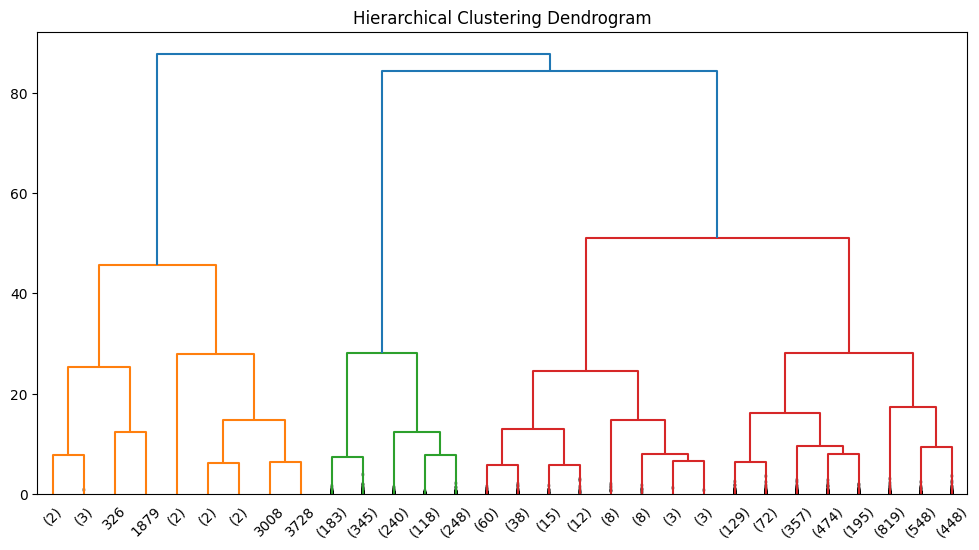

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346,325,1,77183.60,3
12347,1,7,4310.00,4
12348,74,4,1797.24,4
12349,18,1,1757.55,4
12350,309,1,334.40,2


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Perform hierarchical clustering
Z = linkage(rfm_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
plt.title("Hierarchical Clustering Dendrogram")
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=45.,
           leaf_font_size=10., show_contracted=True)
plt.show()

# Choose number of clusters (example: 4)
clusters = fcluster(Z, 4, criterion='maxclust')

# Add cluster labels to RFM
rfm['Cluster'] = clusters
rfm.head()


VISUALIZATION OF CLUSTERS

C:\Users\ishas\AppData\Local\Temp\ipykernel_11444\1336190365.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=rfm, palette='Set2')


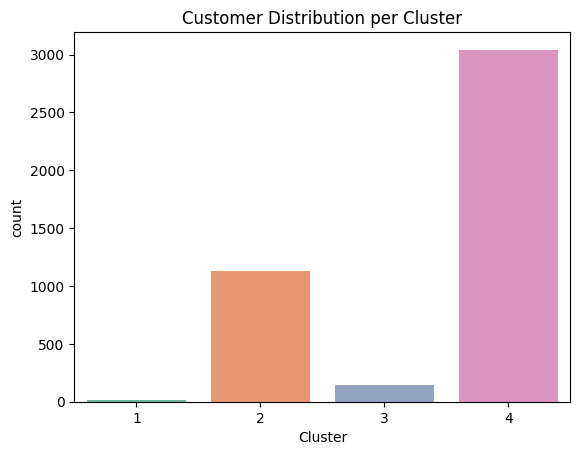

In [ ]:
import seaborn as sns

# Count of customers in each cluster
sns.countplot(x='Cluster', data=rfm, palette='Set2')
plt.title("Customer Distribution per Cluster")
plt.show()


INTERACTIVE 3D PLOT (Plotly)

In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    rfm, x='Recency', y='Frequency', z='Monetary',
    color='Cluster', symbol='Cluster',
    title="Customer Segmentation (3D View)",
    opacity=0.7
)
fig.show()


EVALUATION OF CLUSTERS

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Evaluation scores
sil_score = silhouette_score(rfm_scaled, clusters)
dbi_score = davies_bouldin_score(rfm_scaled, clusters)
chi_score = calinski_harabasz_score(rfm_scaled, clusters)

print("Silhouette Score:", round(sil_score, 3))  # Higher is better
print("Davies-Bouldin Index:", round(dbi_score, 3))  # Lower is better
print("Calinski-Harabasz Index:", round(chi_score, 3))  # Higher is better


Silhouette Score: 0.608
Davies-Bouldin Index: 0.809
Calinski-Harabasz Index: 2926.885


INSIGHTS (Cluster Profiling)




In [ ]:
# Average RFM values per cluster
cluster_summary = rfm.groupby('Cluster').mean().round(2)
print(cluster_summary)

# Add size of each cluster
cluster_summary['NumCustomers'] = rfm['Cluster'].value_counts().sort_index()
cluster_summary


         Recency  Frequency   Monetary
Cluster                               
1           5.73      83.47  111780.64
2         240.41       1.64     518.62
3          13.63      24.44   14435.46
4          40.23       3.89    1479.41


,Recency,Frequency,Monetary,NumCustomers
Cluster,,,,
1,5.73,83.47,111780.64,15
2,240.41,1.64,518.62,1134
3,13.63,24.44,14435.46,147
4,40.23,3.89,1479.41,3042


Cluster 1: Low Recency, High Frequency, High Monetary → Loyal & Valuable customers

Cluster 2: High Recency, Low Frequency, Low Monetary → Lost/Inactive customers

Cluster 3: Medium Recency, Low Frequency, Medium Monetary → Occasional buyers

Cluster 4: Low Recency, Low Frequency, Low Monetary → New customers

SAVE DATASET

In [ ]:
# Save RFM table with clusters to CSV
rfm.to_csv("customer_segments.csv", index=True)

# Or to Excel
rfm.to_excel("customer_segments.xlsx", index=True)



Conclusion-

This project successfully segmented e-commerce customers based on their RFM values using hierarchical clustering. Four distinct customer segments were identified: Loyal & Valuable, Lost/Inactive, Occasional Buyers, and New Customers. This segmentation provides valuable insights into customer behavior and allows for targeted marketing strategies. For example, the Loyal & Valuable segment could be targeted with loyalty programs, while the Lost/Inactive segment could be targeted with win-back campaigns. Further analysis could involve exploring the characteristics of each segment in more detail and developing specific strategies to engage with each group.

